In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple, Dict

In [2]:
class Point:
    def __init__(self, id: str, x: str, y: str):
        self.id: int = int(id)
        self.x: int = int(x)
        self.y: int = int(y)

class AlgRun:
    def read_cycles_line(self, line: str) -> List[Point]:
        points = []
        for point_id in line.split():
            points.append(self.points[str(int(point_id)+1)])
        return points

    def __init__(self, instance, algorithm, distance,
                 cycles: Tuple[str, str], points: Dict[str, Point]):
        self.instance: str = instance
        self.algorithm: str = algorithm
        self.distance: float = distance
        self.points: Dict[str, Point] = points
        self.cycles: Tuple[List[Point], List[Point]] = \
            self.read_cycles_line(cycles[0]), self.read_cycles_line(cycles[1])

    def plot(self):
        for cycle in self.cycles:
            x = [point.x for point in cycle]
            x.append(cycle[0].x)
            y = [point.y for point in cycle]
            y.append(cycle[0].y)
            plt.plot(x, y)
        variant = self.instance + '_' + self.algorithm
        plt.title(f'{variant}_{self.distance}')
        plt.savefig(f'plots/{variant}.png')
        plt.show()

In [3]:
instances = ['kroa100.txt', 'krob100.txt']
algorithms = ['NearestNeighbor', 'GreedyCycle', 'RegretCycle']
runs = {}
for instance in instances:
    for algorithm in algorithms:
        variant = instance + '_' + algorithm
        runs[variant] = []

for instance in instances:
    points = {}
    with open(instance, 'r') as f:
        for line in f:
            id, x, y = line.split()
            points[id] = Point(id, x, y)
    # print(points.keys())

    for algorithm in algorithms:
        print(instance, algorithm)
        variant = instance + '_' + algorithm
        c_fname = 'cycles_' + variant + '_.txt'
        d_fname = 'distances_' + variant + '_.txt'
        with open(c_fname, 'r') as f:
            with open(d_fname, 'r') as d:
                for _ in range(100):
                    c1: str = f.readline()
                    c2: str = f.readline()
                    distance = float(d.readline())
                    alg_run = AlgRun(instance, algorithm, distance, (c1, c2), points)
                    runs[variant].append(alg_run)


kroa100.txt NearestNeighbor
kroa100.txt GreedyCycle
kroa100.txt RegretCycle
krob100.txt NearestNeighbor
krob100.txt GreedyCycle
krob100.txt RegretCycle


In [4]:
# print 10 first runs distances
for variant, run in runs.items():
    print(f'{variant}: {[run.distance for run in run[:10]]}')

kroa100.txt_NearestNeighbor: [28230.9, 24587.7, 31668.6, 26751.8, 25166.6, 27389.8, 22710.6, 23215.9, 28345.6, 27776.0]
kroa100.txt_GreedyCycle: [36871.9, 33763.1, 36229.1, 37857.9, 34169.3, 36490.0, 35344.4, 36119.2, 37711.0, 33864.9]
kroa100.txt_RegretCycle: [52422.5, 73492.7, 70604.6, 47755.3, 57414.5, 53573.2, 48437.2, 61347.5, 56396.5, 69036.6]
krob100.txt_NearestNeighbor: [29332.6, 26735.2, 29471.7, 24976.6, 32413.4, 29776.4, 29567.1, 31132.3, 25376.8, 24548.3]
krob100.txt_GreedyCycle: [39556.0, 34160.8, 34753.4, 33263.6, 38087.9, 39574.8, 34874.6, 33001.8, 33182.3, 34321.6]
krob100.txt_RegretCycle: [60624.5, 50886.2, 49476.1, 72931.5, 57453.4, 73418.4, 59370.9, 45180.8, 74130.1, 74149.7]


In [5]:
best_runs = {}
for variant, run_list in runs.items():
    best_run = min(run_list, key=lambda run: run.distance)
    best_runs[variant] = best_run
    print(f'{variant}: {best_run.distance}')

kroa100.txt_NearestNeighbor: 22710.6
kroa100.txt_GreedyCycle: 30212.3
kroa100.txt_RegretCycle: 44307.8
krob100.txt_NearestNeighbor: 22640.5
krob100.txt_GreedyCycle: 30281.4
krob100.txt_RegretCycle: 44721.6


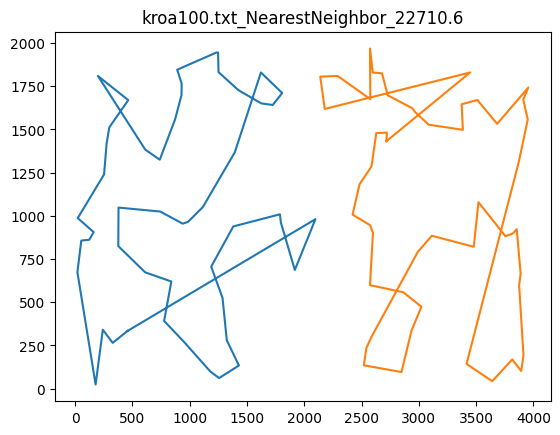

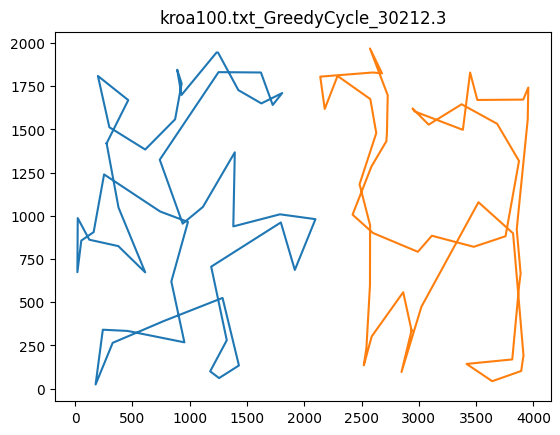

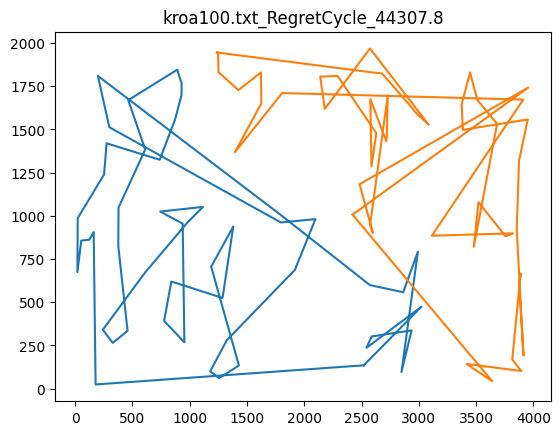

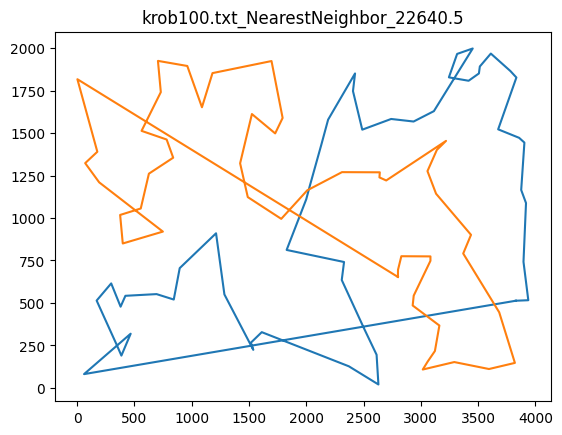

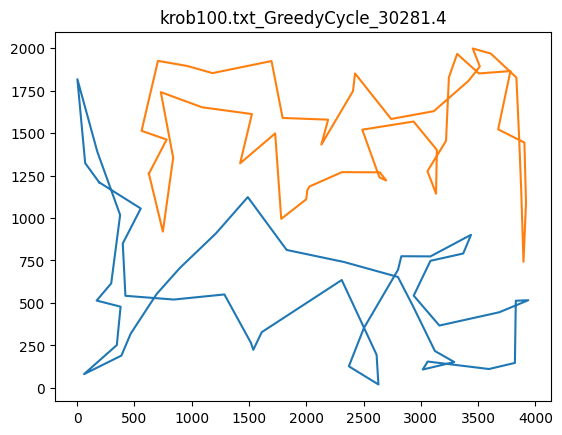

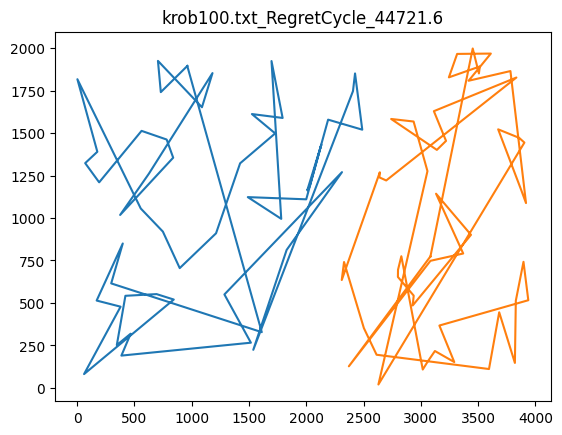

In [6]:
for variant, alg_run in best_runs.items():
    alg_run.plot()

In [7]:
# find max, min and mean distance for each variant
for variant, run_list in runs.items():
    distances = [run.distance for run in run_list]
    print(f'{variant}: min={min(distances)}, max={max(distances)}, mean={np.mean(distances)}')

kroa100.txt_NearestNeighbor: min=22710.6, max=33695.6, mean=27684.943999999996
kroa100.txt_GreedyCycle: min=30212.3, max=39255.8, mean=35163.916000000005
kroa100.txt_RegretCycle: min=44307.8, max=78553.8, mean=58406.605
krob100.txt_NearestNeighbor: min=22640.5, max=33188.5, mean=27673.627
krob100.txt_GreedyCycle: min=30281.4, max=41824.9, mean=35544.154
krob100.txt_RegretCycle: min=44721.6, max=80213.4, mean=60854.71999999998
